# Predictive Analytics for Global Cancer Care

In [41]:
# Loading the Dataset and Important libraries in the Environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore') 
data = pd.read_csv('global_cancer_patients_2015_2024.csv')
print("Lenght and Breath of the Dataset : ",data.shape)
data

In [3]:
# Checking the structure of the Dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [4]:
# Checking the Duplicates in the Dataset
print(data.duplicated().sum())    
print("No Duplicates Found")

0
No Duplicates Found


### Exploratory Data Analysis

Analysing the Data column by column

In [5]:
# Statistical Summary of the 'Age' Column
data['Age'].describe()

count    50000.000000
mean        54.421540
std         20.224451
min         20.000000
25%         37.000000
50%         54.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64

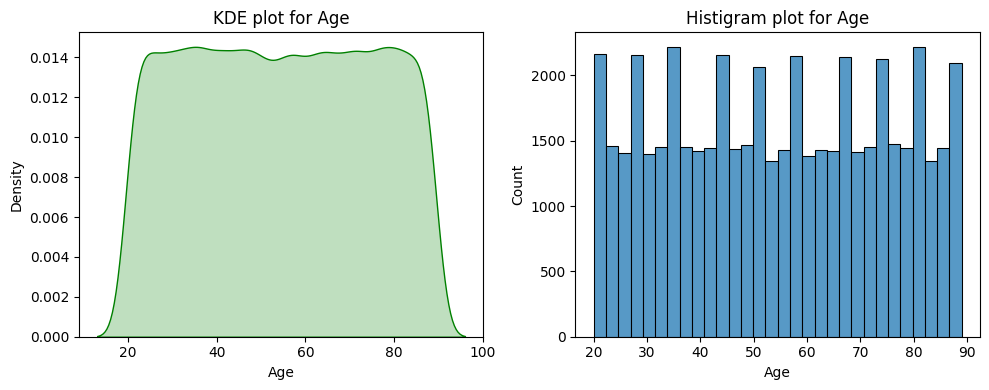

In [103]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
sns.kdeplot(x=data['Age'], fill = True,color= 'green')
plt.title('KDE plot for Age')
plt.subplot(1,2,2)
sns.histplot(x=data['Age'],bins= 30)
plt.title('Histigram plot for Age')
plt.tight_layout()
plt.show()


Some of the basic statistical analysis from age column:
Range : From 20 to  89 <br>
Standard Deviation : 20.22 <br>
Mean : 54.42 <br>
This above two charts indicates the data is normally distributed and have a very board representaion. It is not skewed towards one age category and very suitable for age-based comparative analysis. 

In [19]:
# Statistical Summary of the 'Gender' Column
data['Gender'].describe()

count     50000
unique        3
top        Male
freq      16796
Name: Gender, dtype: object

In [22]:
genderPdata['Gender'].value_counts()

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64

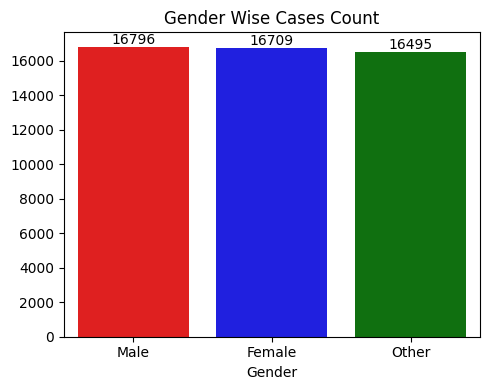

In [74]:
plt.figure(figsize= (5,4))
sns.barplot(x = data['Gender'].value_counts().index,
            y = data['Gender'].value_counts().values,
           palette = ['red', 'blue','green'])

for i,v in enumerate(data['Gender'].value_counts()):
    plt.text(i,v,str(v),ha= 'center',va= "bottom")
plt.title('Gender Wise Cases Count')
plt.tight_layout()

plt.show()

Gender column contains three major catogories - Male, Female and Other <br>
Also all the gender have almost same values. So it is very compatible for Gender specific Analysis.

In [55]:
# Analysing Country column
data['Country_Region'].value_counts()

Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Russia       5017
Brazil       5004
Pakistan     4926
China        4913
Canada       4864
Name: count, dtype: int64

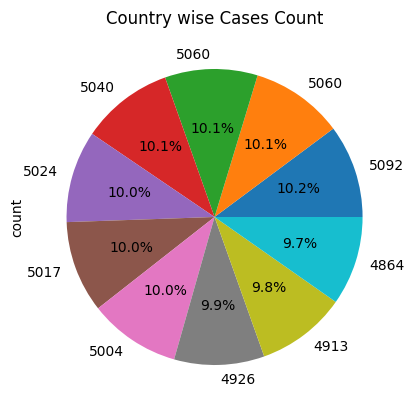

In [73]:
plt.figure(figsize = (5,4))
data['Country_Region'].value_counts().plot(kind= 'pie',labels = data['Country_Region'].value_counts().values,autopct = '%1.1f%%')
plt.tight_layout()
plt.title('Country wise Cases Count')
plt.show()

Australia has the highest number of Patients. I have lot of varition in terms of country (data avialable for 10 different country). Count of each country is appox. the same.

In [71]:
# Analysing column named Cancer_Type
data['Cancer_Type'].value_counts()

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Cervical    6222
Breast      6189
Lung        6159
Name: count, dtype: int64

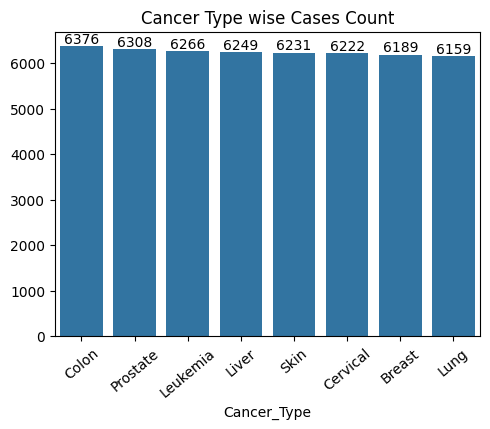

In [87]:
plt.figure(figsize= (5,4))
sns.barplot(x =data['Cancer_Type'].value_counts().index,
            y = data['Cancer_Type'].value_counts().values)

for x,y in enumerate(data['Cancer_Type'].value_counts().values):
    plt.text(x,y,str(y), ha = 'center',va = 'bottom')
plt.title("Cancer Type wise Cases Count")
plt.tight_layout()
plt.xticks(list(data['Cancer_Type'].value_counts().index),rotation=40)
plt.show()

We have in total 8 eight tyoe of Cancer, having approx. same number of value Counts. <br> As per the data the most common Cancer Type is Colon followed by Prostate and Leukemia 

In [88]:
# Analysing column named Cancer_Stage
data['Cancer_Stage'].value_counts()

Cancer_Stage
Stage II     10124
Stage I      10046
Stage III    10008
Stage IV      9933
Stage 0       9889
Name: count, dtype: int64

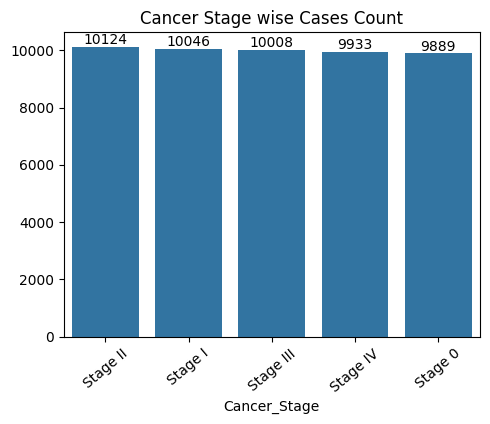

In [89]:
plt.figure(figsize= (5,4))
sns.barplot(x =data['Cancer_Stage'].value_counts().index,
            y = data['Cancer_Stage'].value_counts().values)

for x,y in enumerate(data['Cancer_Stage'].value_counts().values):
    plt.text(x,y,str(y), ha = 'center',va = 'bottom')
plt.title("Cancer Stage wise Cases Count")
plt.tight_layout()
plt.xticks(list(data['Cancer_Stage'].value_counts().index),rotation=40)
plt.show()

Thier are 5 type of Stages type in our data with values ranging form 0 to 4. Again, each stage have approx. same number of counts  <br>
Most comman stages are stage II and I.

In [91]:
data['Treatment_Cost_USD'].describe()

count    50000.000000
mean     52467.298239
std      27363.229379
min       5000.050000
25%      28686.225000
50%      52474.310000
75%      76232.720000
max      99999.840000
Name: Treatment_Cost_USD, dtype: float64

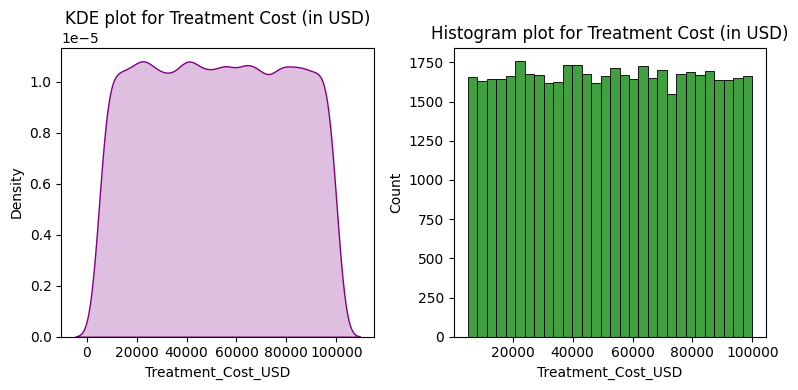

In [106]:
plt.figure(figsize= (8,4))
plt.subplot(1,2,1)
plt.title('KDE plot for Treatment Cost (in USD)')
sns.kdeplot(data['Treatment_Cost_USD'], fill = True, color = 'purple')
plt.subplot(1,2,2)
sns.histplot(data['Treatment_Cost_USD'], bins = 30 ,color = 'green')
plt.title('Histogram plot for Treatment Cost (in USD)')
plt.tight_layout()
plt.show()

Treatment Cost (in USD) have no Skewness, their are approx. similar count of the under each bins (as refered from histogram) 

In [108]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [115]:
cancer_causes_  = ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
data[data_of_interest].agg(['mean', 'std','max','min',])

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
max,10.000000,10.000000,10.000000,10.000000,10.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000


These variables have almost the same average values and spread, which means they were probably measured using the same scale. They are important because they help us study how different factors like genetic risk and smoking work together to affect survival.

# Inferential & Predictive Analytics

## Determine the relationship between risk factors and cancer severity

In [117]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

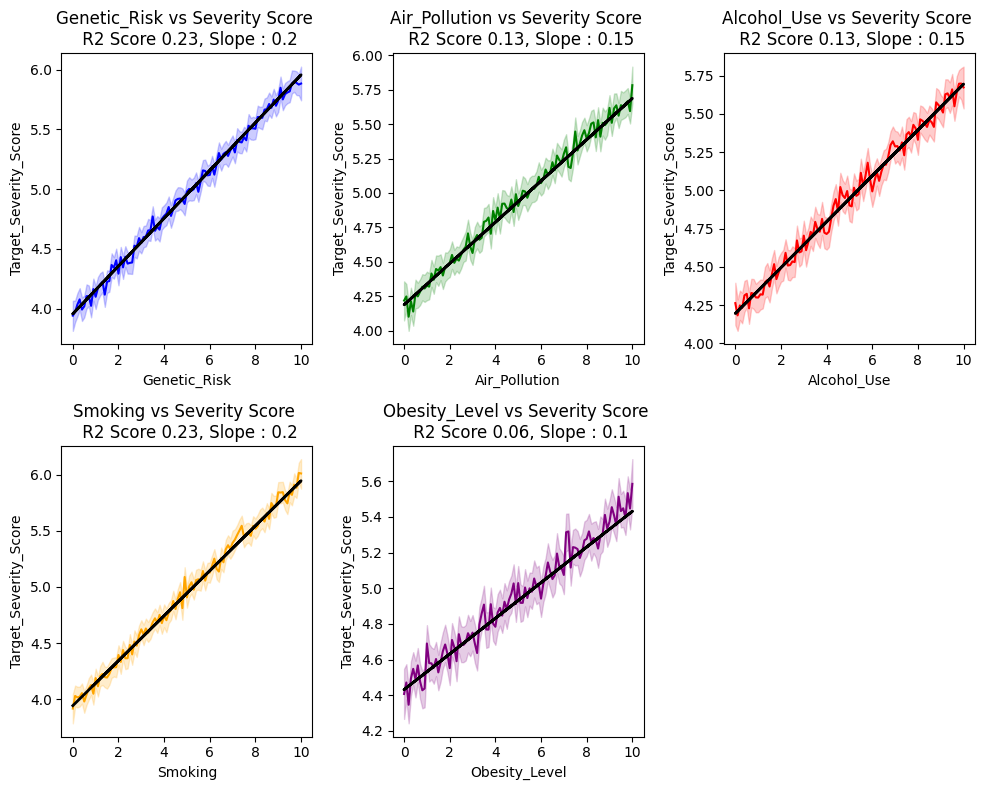

In [131]:
from scipy.stats import linregress
risk_factors = ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']  # Converting the all Rick Factors into a List
colors = ['blue','green','red','orange','purple']

plt.figure(figsize = (10,8))

for i, (factor , color) in enumerate(zip(risk_factors,colors),1):
    plt.subplot(2,3,i)
    x=data[factor]
    y=data['Target_Severity_Score']
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    r_squred =  round(r_value**2,2)
    slope = round(slope,2)
    sns.lineplot(x=factor,y="Target_Severity_Score",data=data,color= color)
    plt.plot(x,x*slope+intercept,color = "black", linewidth= 2,label= "Regression Line")
    plt.title(f'{factor} vs Severity Score \n R2 Score {r_squred}, Slope : {slope}')

# line : y = mx+c

plt.tight_layout()
plt.show()

#### Genetic_Risk vs Severity Score Analysis <br>

This chart displays the relationship between a person's Genetic Risk and their Severity Score. The Severity Score shows an increase with genetic risk. The data indicates that only 23% of the variation in the Severity Score is explained by Genetic Risk, as indicated by the R-squared value of 0.23. The slope of 0.2 suggests a positive association. The shaded area represents the confidence interval, typically at 95%, implying that the true relationship likely falls within this range. While there is a positive association, the R-squared value highlights that the linear model is a very weak predictor of the Severity Score based on Genetic Risk.

##### Air_Pollution vs Severity Score Analysis <br>

This chart illustrates the relationship between Air Pollution and a person's Severity Score. We observe a positive trend where higher levels of air pollution are associated with an increase in the Severity Score. With an R-squared value of 0.23, only 23% of the variability in the Severity Score can be accounted for by Air Pollution in this linear model. The slope of 0.2 reinforces this positive relationship. The confidence interval, visible as the shaded green area, shows the range within which the true regression line is expected to lie. Although there's a positive relationship, the low R-squared score signifies that Air Pollution is a weak linear predictor of the Severity Score.

##### Alcohol_Use vs Severity Score Analysis <br>

This chart examines the relationship between Alcohol Use and Severity Score. It shows a positive correlation, meaning that as alcohol use increases, the Severity Score tends to increase. However, the R-squared score of 0.13 indicates that only 13% of the variation in the Severity Score can be explained by Alcohol Use. The slope of 0.15 further confirms this positive, albeit weak, association. The confidence interval (shaded red area) provides a range of uncertainty for the estimated relationship. This suggests a weak positive linear relationship, and Alcohol Use is not a strong predictor of the Severity Score on its own.

#####  Smoking vs Severity Score Analysis <br>

This chart illustrates the relationship between Smoking and Severity Score. There is a clear positive trend: as smoking increases, the Severity Score tends to increase. The R-squared value of 0.23 indicates that only 23% of the variance in the Severity Score can be predicted from smoking in this linear model. The slope of 0.2 reinforces this positive association. The shaded area represents the confidence interval, typically at 95%, suggesting the range where the true relationship likely lies. While a positive relationship exists, the low R-squared score suggests that smoking is a weak linear predictor of the Severity Score.


#####  Obesity_Level vs Severity Score Analysis<br>
This chart displays the relationship between Obesity Level and Severity Score. We observe a positive linear trend, meaning that as the obesity level increases, the Severity Score tends to increase. However, the R-squared score of 0.06 is extremely low, indicating that only 6% of the variability in the Severity Score can be explained by Obesity Level in this linear model. The slope of 0.1 confirms a positive association. The shaded purple area represents the confidence interval, showing the uncertainty around the regression line. This analysis suggests a very weak linear relationship, making Obesity Level a poor linear predictor of the Severity Score on its own.

#### Summary of Findings: Factors Affecting Severity Score
#### Analysis of the relationship between various risk factors and the Target_Severity_Score reveals several key insights:

#####  1. Limited Predictive Power (Weak Linear Relationships): The R-squared values for all examined risk factors (ranging from 0.06 to 0.23) are quite low. This indicates that while a relationship exists between these factors and the Target_Severity_Score, it is predominantly weak. Individually, these factors account for a very small portion of the overall variation observed in the severity scores, suggesting they are not strong standalone predictors.

#####  2. Consistent Positive Trends: Despite their limited predictive power, all risk factors exhibit positive slope values. This implies a general tendency for the Target_Severity_Score to increase as each individual risk factor increases. However, the low R-squared values underscore that this positive trend is not consistently strong across all data points.

#####  3. Presence of Unidentified Influences: The consistently low R-squared values strongly suggest that the variation in Target_Severity_Score is influenced significantly by other factors not included in this analysis. The risk factors we've examined show only a weak correlation with the target variable and are, by themselves, unreliable for making precise predictions.

## Analyze the proportion of early-stage diagnoses by cancer type

In [134]:
# Listing all the different Cancer Type
data['Cancer_Type'].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [154]:
for x in data['Cancer_Type'].unique():
    stage_count = data.loc[data['Cancer_Type']==x,"Cancer_Stage"].value_counts()
    early_stage_sum = stage_count.get("Stage 0",0) + stage_count.get("Stage I",0) 
    total_sum = stage_count.sum()
    proportion = (early_stage_sum/total_sum) * 100
    print(f"Proportion of the {x} cancer dignosed at early stage (i.e 0 and 1) : {round(proportion,2)}\n",'\n',"-"*30,'\n')

Proportion of the Lung cancer dignosed at early stage (i.e 0 and 1) : 38.43
 
 ------------------------------ 

Proportion of the Leukemia cancer dignosed at early stage (i.e 0 and 1) : 39.53
 
 ------------------------------ 

Proportion of the Breast cancer dignosed at early stage (i.e 0 and 1) : 39.47
 
 ------------------------------ 

Proportion of the Colon cancer dignosed at early stage (i.e 0 and 1) : 40.42
 
 ------------------------------ 

Proportion of the Skin cancer dignosed at early stage (i.e 0 and 1) : 40.41
 
 ------------------------------ 

Proportion of the Cervical cancer dignosed at early stage (i.e 0 and 1) : 39.86
 
 ------------------------------ 

Proportion of the Prostate cancer dignosed at early stage (i.e 0 and 1) : 40.19
 
 ------------------------------ 

Proportion of the Liver cancer dignosed at early stage (i.e 0 and 1) : 40.61
 
 ------------------------------ 



The analysis demonstrates that early-stage diacnosis for various cancer types is relatively widespread, with most cancers having an early diacnosis
rate between 38.43% and 40.61%. Liver Cancer shows the highest proportion, while Lunc Cancer shows the lowest. These findings succest that while
screening and diagnostic methods are effective, improvements can still be made, particularly in lung cancer detection.
Further research into screening strategies, early intervention, and the use of advanced diagnostic technologies could help increase the proportion of
early-stage diagnoses j ultimately leading to better survival rates and outcomes for cancer patients. The relatively small variations across the cancer
types indicate that, in general, healthcare systems may need to focus on enhancing early detection uniformly, with targeted efforts to address specific
gaps in detection, particularly for cancers like lung cancer.

## Identify key predictors of cancer severity and survival years

In [165]:
features = ['Age','Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
target = ['Survival_Years','Target_Severity_Score']

pearson_corr = data[features+target].corr(method = 'pearson')
spearman_corr = data[features+target].corr(method = 'spearman')

corr_df = pd.concat([pearson_corr[target],spearman_corr[target]],axis=1, keys = ["Pearson","Spearman"])
corr_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

In [158]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')